<a href="https://colab.research.google.com/github/surryjenn/Complete-Feature-Engineering/blob/master/2_Gender_Detection_Predict_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools
from sklearn.utils import shuffle
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation,BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.metrics import categorical_accuracy

In [ ]:
# Load data

In [ ]:
# Data Collection 
# Create a directory in google drive to store datasets
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Make use of ImageDataGenerator to read the data
# Build the Data Generators 

In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, validation_split = 0.2)
train_generator = datagen.flow_from_directory(r"/content/gdrive/MyDrive/AI internship/Pranava/Gender Detection Final/PRAICP-1001-GenderDetc/Data/gender_dataset_face",target_size=(224,224),
                                            batch_size=BATCH_SIZE,interpolation="lanczos",shuffle=True,subset='training')
validation_generator = datagen.flow_from_directory(r"/content/gdrive/MyDrive/AI internship/Pranava/Gender Detection Final/PRAICP-1001-GenderDetc/Data/gender_dataset_face",target_size=(224,224),
                                            batch_size=BATCH_SIZE,interpolation="lanczos",shuffle=True,subset='validation')

Found 1847 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
print('Number of samples: ',train_generator.samples)
print('Number of samples: ',validation_generator.samples)
print('Number of classes: ',len(train_generator.class_indices))
print('Number of classes: ',len(validation_generator.class_indices))
print('Number of samples per class:', int(train_generator.samples/len(train_generator.class_indices)))
print('Number of samples per class:', int(validation_generator.samples/len(validation_generator.class_indices)))

Number of samples:  1847
Number of samples:  460
Number of classes:  2
Number of classes:  2
Number of samples per class: 923
Number of samples per class: 230


In [ ]:
train_generator.filenames[0:5]

['man/face_1269.jpg',
 'man/face_127.jpg',
 'man/face_1270.jpg',
 'man/face_1271.jpg',
 'man/face_1272.jpg']

In [ ]:
print(train_generator.class_indices)

{'man': 0, 'woman': 1}


In [ ]:
print(validation_generator.class_indices)

{'man': 0, 'woman': 1}


In [ ]:
class_mapping = {v:k for k,v in train_generator.class_indices.items()}

In [ ]:
class_mapping 

{0: 'man', 1: 'woman'}

In [ ]:
class_mapping = {v:k for k,v in validation_generator.class_indices.items()}

In [ ]:
class_mapping

{0: 'man', 1: 'woman'}

In [ ]:
X_train,y_train = next(train_generator)
print('X_train: ',type(X_train))
print('y_train: ',type(y_train))
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)

X_train:  <class 'numpy.ndarray'>
y_train:  <class 'numpy.ndarray'>
X_train:  (32, 224, 224, 3)
y_train:  (32, 2)


In [ ]:
X_val,y_val = next(validation_generator)
print('X_val: ',type(X_val))
print('y_val: ',type(y_val))
print('X_val: ',X_val.shape)
print('y_val: ',y_val.shape)

X_val:  <class 'numpy.ndarray'>
y_val:  <class 'numpy.ndarray'>
X_val:  (32, 224, 224, 3)
y_val:  (32, 2)


In [ ]:
X_train

array([[[[0.05490196, 0.02352941, 0.        ],
         [0.05490196, 0.02352941, 0.        ],
         [0.05490196, 0.02352941, 0.        ],
         ...,
         [0.3924103 , 0.36898223, 0.36098707],
         [0.41109607, 0.379991  , 0.37972352],
         [0.47474614, 0.45078316, 0.4767167 ]],

        [[0.05490196, 0.02352941, 0.        ],
         [0.05490196, 0.02352941, 0.        ],
         [0.05490196, 0.02352941, 0.        ],
         ...,
         [0.39642423, 0.37460178, 0.3641982 ],
         [0.40708214, 0.3775826 , 0.3757096 ],
         [0.4610987 , 0.43553016, 0.45584413]],

        [[0.05490196, 0.02352941, 0.        ],
         [0.05490196, 0.02352941, 0.        ],
         [0.05490196, 0.02352941, 0.        ],
         ...,
         [0.40357286, 0.3802213 , 0.36740938],
         [0.39092603, 0.35883838, 0.35535976],
         [0.3909252 , 0.36105612, 0.3741984 ]],

        ...,

        [[0.22099026, 0.16824186, 0.0482156 ],
         [0.22339861, 0.16984744, 0.04339886]

In [ ]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
y_val

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
X_val

array([[[[2.18963191e-01, 1.20923974e-01, 1.04593039e-01],
         [2.19439745e-01, 1.21400520e-01, 1.05546124e-01],
         [2.18682557e-01, 1.20643340e-01, 1.05265491e-01],
         ...,
         [6.11393690e-01, 3.17647070e-01, 1.91204891e-01],
         [6.09453499e-01, 3.17647070e-01, 1.95344940e-01],
         [6.11551702e-01, 3.17833930e-01, 1.95821479e-01]],

        [[2.09864333e-01, 1.11825101e-01, 9.93866697e-02],
         [2.08434686e-01, 1.10395461e-01, 9.84335765e-02],
         [2.07005039e-01, 1.08965814e-01, 9.69217420e-02],
         ...,
         [6.05298758e-01, 3.17647070e-01, 1.92156881e-01],
         [6.01724565e-01, 3.11727881e-01, 1.95830896e-01],
         [6.00837886e-01, 3.10375959e-01, 1.96078449e-01]],

        [[1.98186800e-01, 1.00147583e-01, 8.51640925e-02],
         [1.96757153e-01, 9.87179428e-02, 8.32579061e-02],
         [1.95828140e-01, 9.77889150e-02, 8.21026415e-02],
         ...,
         [6.01738453e-01, 3.13280821e-01, 1.94810271e-01],
         [

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val,num_classes=2)
print(y_val.shape)
print(y_train.shape)
print(X_train.shape)
print(X_val.shape)

(32, 2, 2)
(32, 2, 2)
(32, 224, 224, 3)
(32, 224, 224, 3)


In [ ]:
y_val

array([[[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[1.,

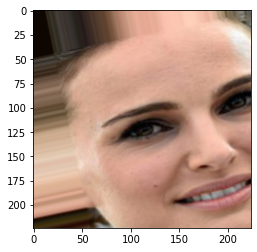

In [ ]:
image = X_train[0,:,:,:]
plt.imshow(image)
plt.show()

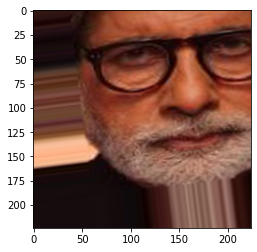

In [ ]:
image = X_val[0,:,:,:]
plt.imshow(image)
plt.show()

### Model deployment
- CNN


In [ ]:
input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)

#### CNN (Convolution Neural Network)

In [ ]:
# CNN (Convolution Neural Network)

In [ ]:
from keras.models import Sequential
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))




In [ ]:
model.compile(
   optimizer = "rmsprop",
  loss = "binary_crossentropy",
 metrics = ['accuracy']
)

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_38 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 dropout_12 (Dropout)        (None, 111, 111, 32)    

In [ ]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train)//BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(X_val)//BATCH_SIZE,
 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 2.1435 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 2.1722 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 2.2019 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 2.1134 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 2.0596 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 2.0553 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 2.0635 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=========================